<a href="https://colab.research.google.com/github/muu86/ml_study/blob/main/1_K_NN_(%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn


     |████████████████████████████████| 542kB 9.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=f61f2f388e86339f0258d1b9cfd060e67f2b239b4b682a152960ee34d60caa98
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


# K-NN ( k - Nearest - Neighbors)

최근접 이웃 알고리즘은 데이터 포인트 주변에 가장 가까운 데이터 포인트 k개를 기준으로 결과를 결정짓는 알고리즘. 분류, 회구 모두 사용 가능

In [2]:
import mglearn
import matplotlib.pyplot as plt

%matplotlib inline

## k-NN Classification

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


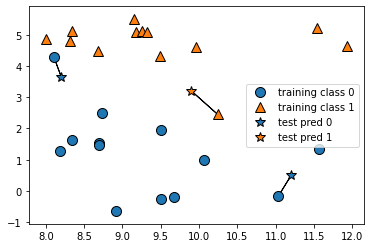

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=1)  # 이웃 1

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


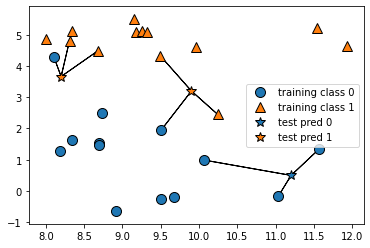

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)  # 이웃 3

이웃의 갯수가 늘어나면 k-NN 모델의 복잡도는?
* 복잡도가 내려간다  ( 일반화)   헷갈렸음

이웃 갯수가 적을 때
* 과대 적합


In [15]:
from sklearn.model_selection import train_test_split
# k-NN 사용하기

# 1. 데이터 불러오기
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [17]:
# 2. k-NN 분류기 불러오기
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# 3. 훈련하기
clf.fit(X_train, y_train)

# 4. 테스트 세트 예측
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

# 5. 테스트 세트 점수 확인
print("테스트 세트 점수: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]
테스트 세트 점수: 0.86


score 의 뜻 : 모델이 테스트셋에 있는 샘플 중 86% 를 정확하게 분류했음

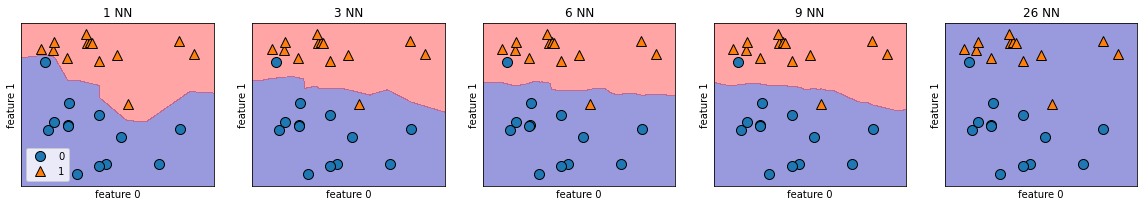

In [18]:
fig, axes = plt.subplots(1, 5, figsize=(20,3))

for n_neighbors, ax in zip([1,3,6,9,26], axes):
    # fit 메서드는 self 반환을 하기 때문에 객체 생성과 메서드를 한줄에 사용 할 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax=ax)
    ax.set_title("{} NN".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc=3)

In [7]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    stratify=cancer.target, # 계층적 분할을 수행할 데이터 지정
                                                    random_state=66)

In [8]:
# 정확도를 기록하기 위한 리스트 생성
train_accuracy = []
test_accuracy = []

# 이웃의 갯수를 설정 ( 1 ~ 10 )개
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # 모델 생성하기
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  
  # 훈련
  clf.fit(x_train, y_train)

  # 훈련 세트 정확도 저장하기
  train_accuracy.append(clf.score(x_train, y_train))
  test_accuracy.append(clf.score(x_test, y_test))

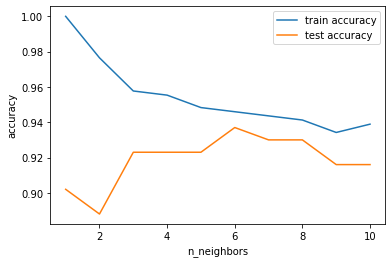

In [9]:
# 시각화
plt.plot(neighbors_settings, train_accuracy, label="train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

# k-NN Regression

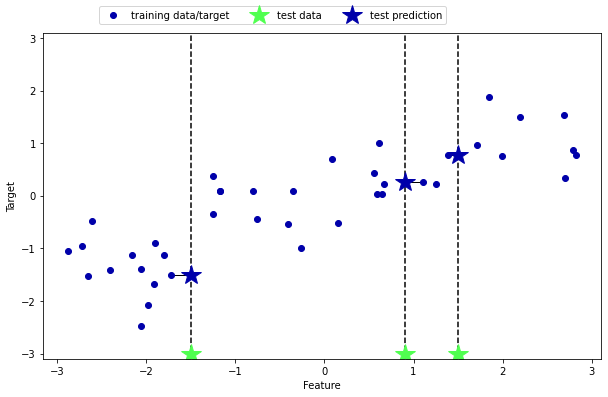

In [10]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

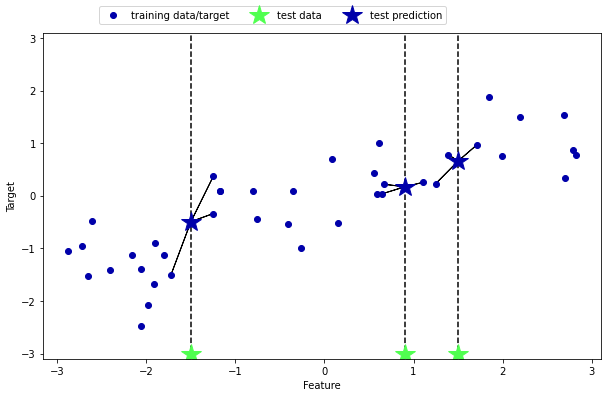

In [11]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

x, y = mglearn.datasets.make_wave(n_samples=40)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(x_train, y_train)

print("테스트 세트 예측 : \n{}".format(reg.predict(x_test)))
print("테스트 세트 점수 : {: .2f}".format(reg.score(x_test, y_test)))

테스트 세트 예측 : 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 점수 :  0.83


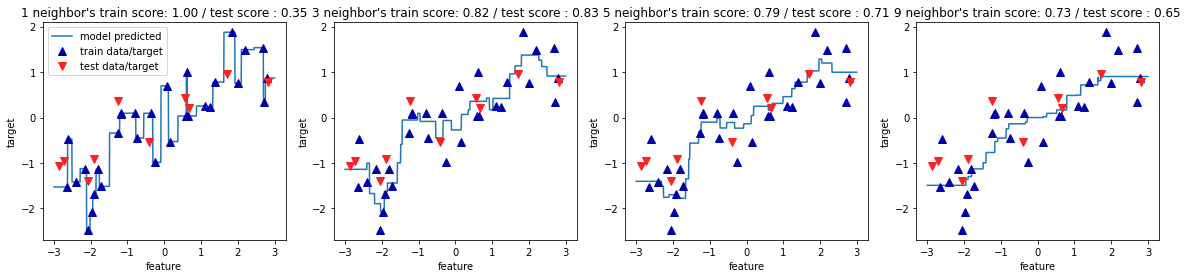

In [13]:
import numpy as np
fig, axes = plt.subplots(1,4, figsize=(20,4))
#-3과 3 사이에 1000개의 데이터 만들기 -> 테스트 용도로 사용함
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,5,9], axes):
    # 이웃의 개수를 1,3,9로 하여 예측하는 모델을 만듭니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x_train, y_train)
    ax.plot(line, reg.predict(line)) # 테스트 용도로 만든 데이터를 예측하고 예측 결과를 선으로 표현합니다.
    ax.plot(x_train, y_train, '^', c=mglearn.cm2(0), markersize=8) # 훈련 데이터를 그래프에 표시합니다.
    ax.plot(x_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)   # 테스트 데이터를 그래프에 표시합니다.
    # 훈련 데이터의 점수와 테스트 데이터의 점수를 제목에 표현합니다.
    ax.set_title("{} neighbor's train score: {:.2f} / test score : {:.2f}".format(n_neighbors, reg.score(x_train, y_train), reg.score(x_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
axes[0].legend(["model predicted", "train data/target", "test data/target"], loc="best")